# SIOC 221A: HW1


In [15]:
import numpy as np 
import matplotlib.pyplot as plt
import netCDF4
import datetime as dt 
import matplotlib.dates as mdates
import pandas as pd 

# Q1: Download 2021 SST from Scripps Pier


In [32]:
url = 'http://thredds.sccoos.org/thredds/dodsC/autoss/scripps_pier-2021.nc'
nc = netCDF4.Dataset(url)

time = nc['time'][:]
temp = nc['temperature'][:]
sal = nc['salinity'][:]
p = nc['pressure'][:]
chl = nc['chlorophyll'][:]
station = nc['station'][:]
lon = nc['lon'][:]; lat = nc['lat'][:]
zeta = nc['depth'][:]

In [34]:
# let's figure out our time units 
units = nc['time'].units 
print(units)
cal = nc['time'].calendar
print(f'{cal} calendar')

seconds since 1970-01-01 00:00:00 UTC
julian calendar


In [35]:
# time units = 'seconds since 1970-01-01 00:00:00 UTC'
# but! in julian calendar... so?

start_time = dt.datetime(1970,1,1)
time_array = np.array(time.data)
dates = [start_time + dt.timedelta(seconds=float(tt)) for tt in time_array]



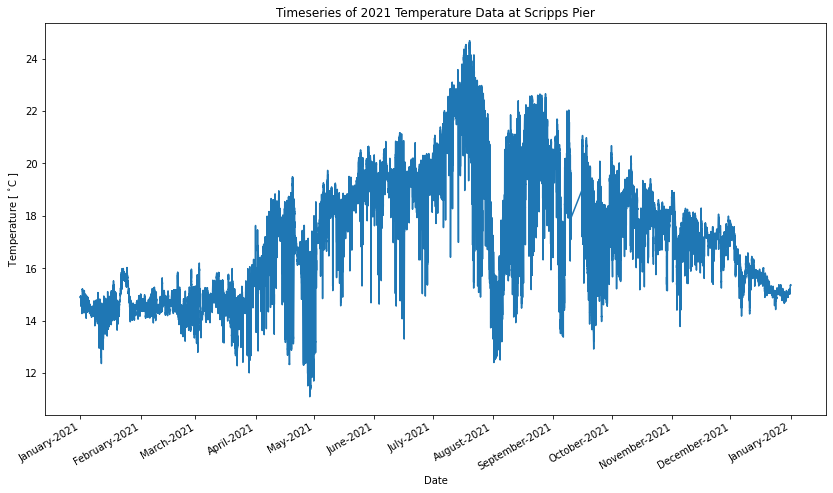

In [36]:
# part a: produce line plot of 2021 temps

fig,ax = plt.subplots(1,1,figsize=(14,8))
ax.plot(dates,temp) #,c=temp,cmap='Spectral_r')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
fig.autofmt_xdate()
ax.set(title='Timeseries of 2021 Temperature Data at Scripps Pier', xlabel='Date', ylabel=r'Temperature [ $^{\circ}$C ]')
plt.show()



# Observations from plot: 
### I notice the temperature variability is higher in the summer than in the winter. A seasonal trend is visible - with higher summer temperatures than winter temperatures. There is a sharp drop in August, which then returns to a bit less than the previous temperature state after about a week.

In [37]:
# part b: compute mean and stdev 

temp_mean = np.nanmean(temp)
print(f'Temperature Mean of 2021 is: {temp_mean} deg C')
temp_std = np.std(temp)
print(f'Temperature Standard Deviation of 2021 is: {temp_std} deg C')


Temperature Mean of 2021 is: 17.273984909057617 deg C
Temperature Standard Deviation of 2021 is: 2.425363302230835 deg C


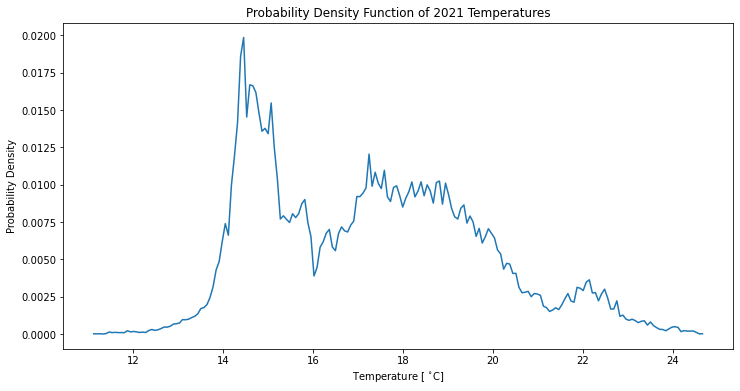

129244


In [45]:
# part c: empirical probability density function

[num_bin,bin_edges] = np.histogram(temp,bins=200)
mid_bins = (bin_edges[1:]+bin_edges[0:-1])/2

fig,ax = plt.subplots(1,1,figsize=(12,6))
ax.set_title('Probability Density Function of 2021 Temperatures')
ax.set_xlabel(r'Temperature [ $^{\circ} $C]'); ax.set_ylabel('Probability Density')
plt.plot(mid_bins,num_bin/sum(num_bin)) 
plt.show()

print(sum(num_bin))


### The temperature mean and standard deviation tell us about the average temperature throughout the year and the standard deviation tells us about the variability across temperature measurements.

### The PDF shown of the 2021 temperature dataset looks potentially like a trimodal distribution, more than anything we specifically discussed in class. There are 3 peaks, or 3 most frequent occurences, in the temperature observations, which are around 15 degrees, in the range of 18 degrees, and 22 degrees. 

## Q2: Extending the record

In [46]:
years = np.arange(2005,2022) # going from 2005 to 2021
year_string = [str(yy) for yy in years]

url_base = 'http://thredds.sccoos.org/thredds/dodsC/autoss/scripps_pier-'
urls = [url_base+yy+'.nc' for yy in year_string]
time = np.array([])
temp = np.array([])
sal = np.array([])
p = np.array([])
chl = np.array([])
station = np.array([])
lon = np.array([]); lat = np.array([])
zeta = np.array([])

for n,fn in enumerate(urls):
    # read current file: 
    nc = netCDF4.Dataset(fn)
    t_now = nc['time'][:]
    t_here = nc['temperature'][:]
    s_here = nc['salinity'][:]
    p_here = nc['pressure'][:]
    c_here = nc['chlorophyll'][:]
    s_here = nc['station'][:]
    lon_here = nc['lon'][:]; lat_here = nc['lat'][:]
    z_here = nc['depth'][:]

    # append to extended record
    time = np.append(time,t_now)
    temp = np.append(temp,t_here)
    sal = np.append(sal,s_here)
    p = np.append(p,p_here)
    chl = np.append(chl,c_here)
    station = np.append(station,s_here)
    lon = np.append(lon,lon_here); lat = np.append(lat,lat_here)
    zeta = np.append(zeta,z_here)

s0 = dt.datetime(1970,1,1)
dates = [s0+dt.timedelta(seconds=float(tt)) for tt in time.data]

# trying to make a dataframe with all data, but noticed that matplotlib is annoying about plotting these - will iterate
SP = pd.DataFrame({'dates':np.array(dates),'temp':temp,'p':p,'chl':chl}) # scripps pier df
# information I couldn't add because size requirements: 'sal':sal, 'station':station,'lon':lon,'lat':lat,'zeta':zeta}) # scripps pier df



In [48]:
# Q2 part a: do the same thing
# compute mean and stdev - but finding & excluding anamalous data

outlier = np.nonzero(temp>50) 

print(temp[outlier])


[97.]


In [49]:
# physically, doesn't make sense to find anything over 50 deg in the ocean - especially not 97 deg C !

SP.temp[SP.temp>50] = np.nan
temp[temp>50] = np.nan # also saving as temp because for some reason matplotlib won't plot when saved in dataframe? 


temp_mean = np.nanmean(SP.temp)
temp_std = np.std(SP.temp)



/tmp/ipykernel_132401/3622008675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SP.temp[SP.temp>50] = np.nan


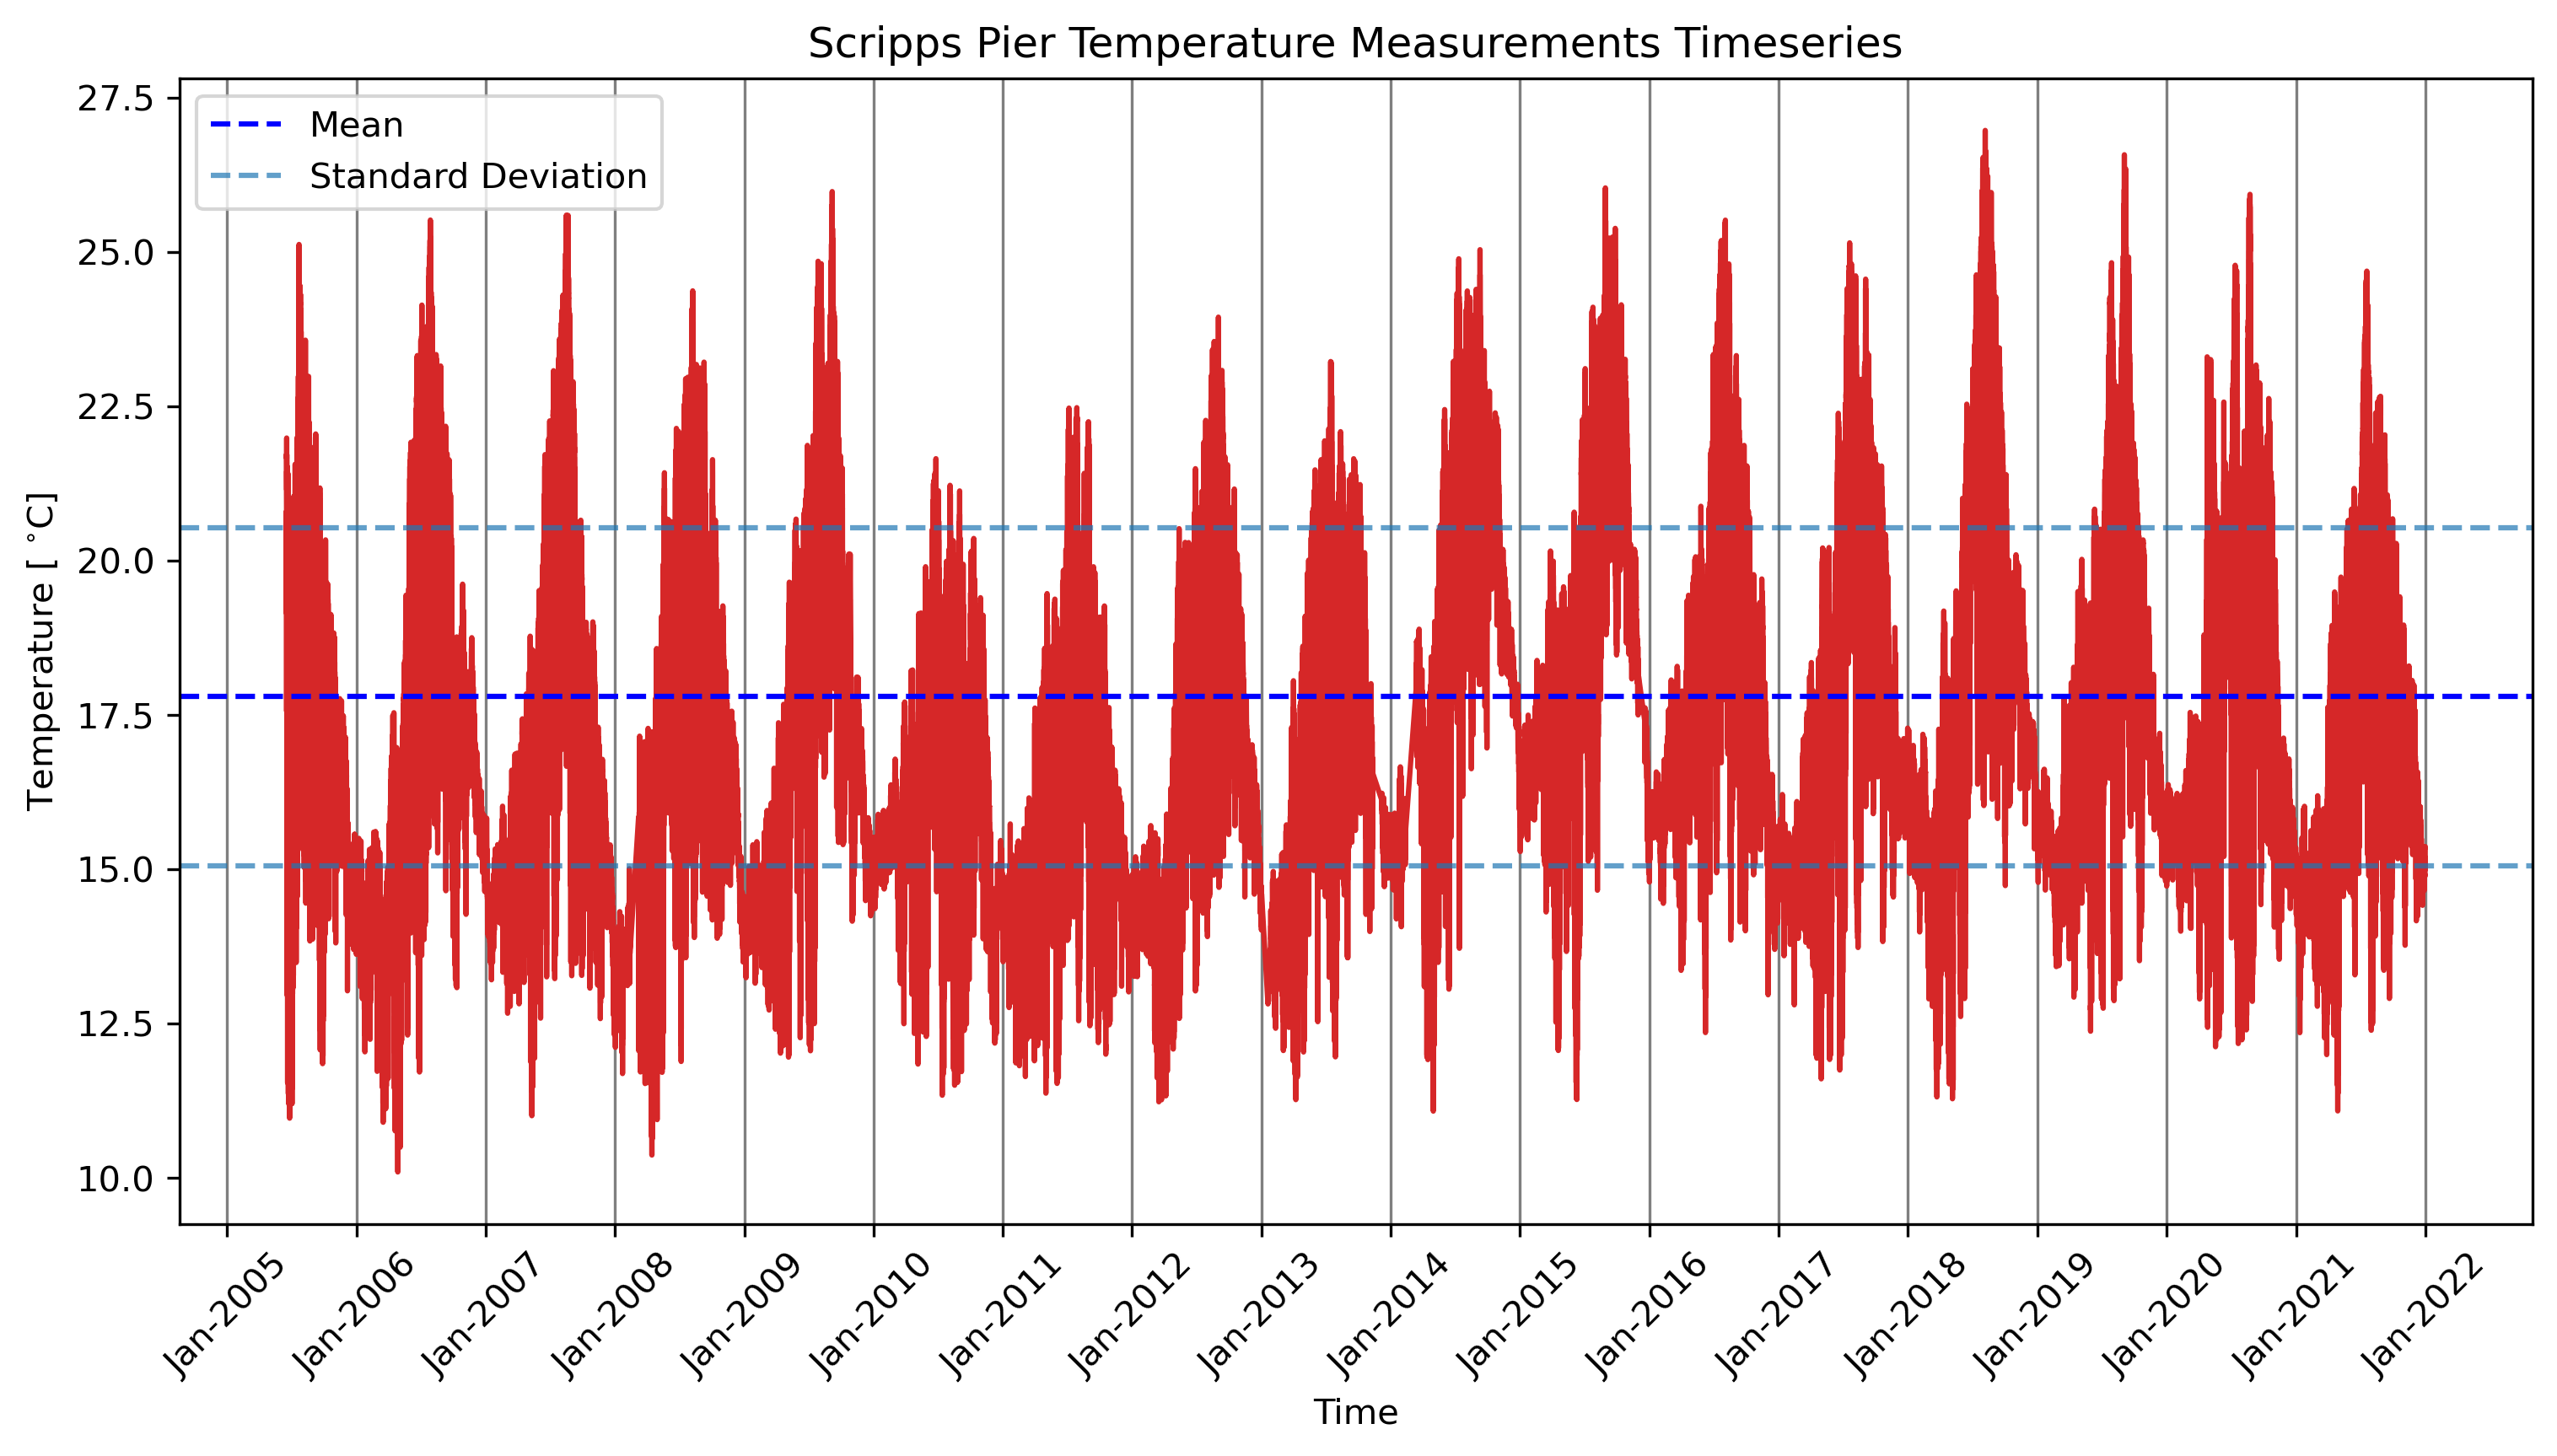

In [50]:

fig,ax = plt.subplots(1,1,figsize=(12,6),dpi=300)
ax.plot(dates,temp,color='tab:red') 
m = ax.axhline(y=temp_mean,linestyle='--',color='blue',label='Mean');
s1 = ax.axhline(y=temp_mean+temp_std,linestyle='--',color='tab:blue',alpha=0.7,label='Standard Deviation')
s2 = ax.axhline(y=temp_mean-temp_std,linestyle='--',color='tab:blue',alpha=0.7,label='Standard Deviation')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y')) # b is short, B is long, m is number
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.tick_params(axis='x',rotation=45)
ax.set(title='Scripps Pier Temperature Measurements Timeseries',xlabel='Time',ylabel=r'Temperature [ $ ^{\circ} $C]')
ax.grid(which='major',axis='x',color='tab:gray')
handles = ['Mean','Standard Deviation']
ax.legend([m,s2],handles,loc='best')
plt.show()



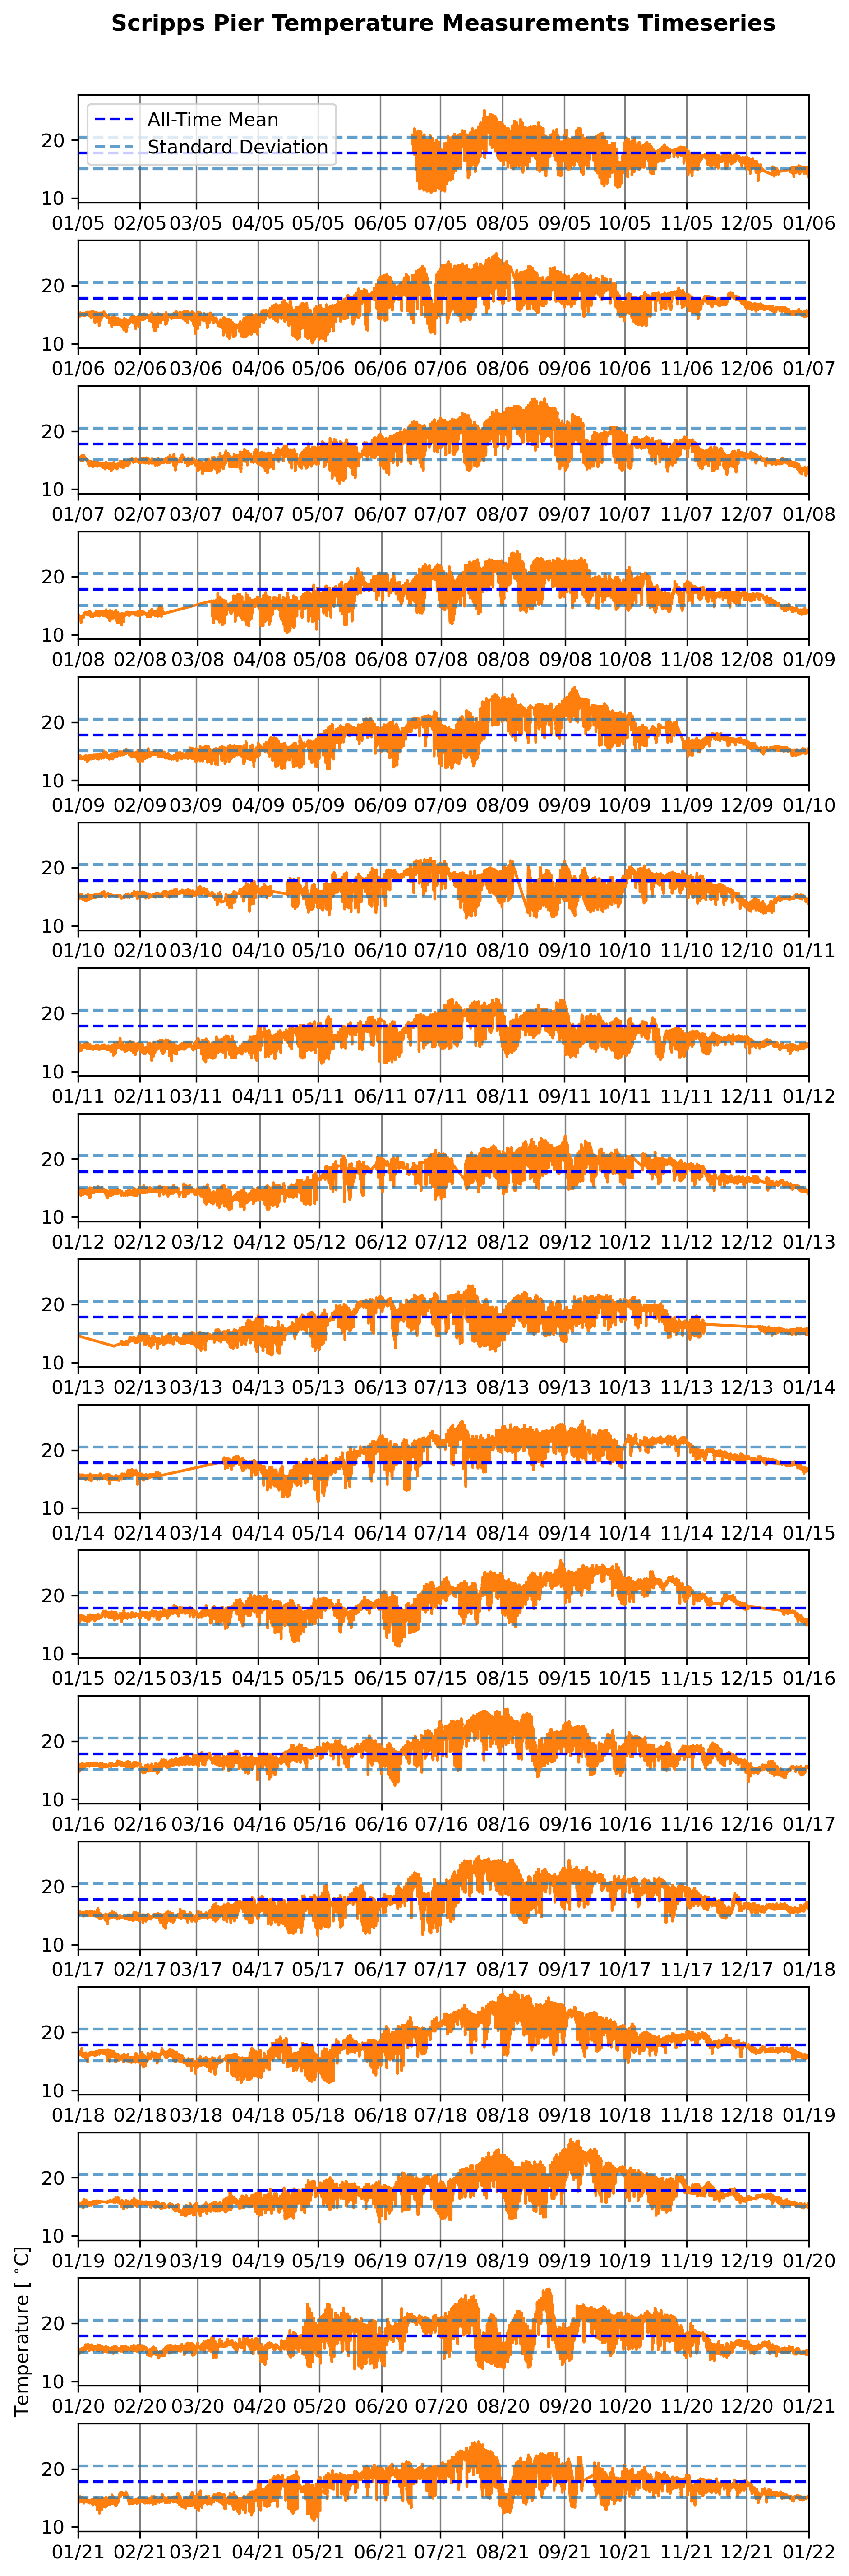

In [55]:
# now plotting every year to look more closely at trends: 

num_yr = len(years);

fig,ax = plt.subplots(figsize=(6,20),dpi=300)
plt.suptitle('Scripps Pier Temperature Measurements Timeseries',fontweight='bold',y=0.98)
aa = 0;
for num,yr in enumerate(years): 
    aa = aa + 1; 
    ax = plt.subplot(num_yr,1,aa)
    ax.plot(dates,temp,color='tab:orange')
    ax.set_xlim([dt.datetime(yr,1,1), dt.datetime(yr+1,1,1)])
    m = ax.axhline(y=temp_mean,linestyle='--',color='blue',label='All-Time Mean');
    s1 = ax.axhline(y=temp_mean+temp_std,linestyle='--',color='tab:blue',alpha=0.7,label='Standard Deviation')
    s2 = ax.axhline(y=temp_mean-temp_std,linestyle='--',color='tab:blue',alpha=0.7,label='Standard Deviation')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y')) # b is short, B is long, m is number
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    if aa == num_yr-1: 
        ax.set(xlabel='Time',ylabel=r'Temperature [ $ ^{\circ} $C]')
    ax.grid(which='major',axis='x',color='tab:gray')
    handles = ['All-Time Mean','Standard Deviation']
    if aa == 1: 
        ax.legend([m,s2],handles,loc='best')
        
plt.subplots_adjust(left=0.05,
                    bottom=0.05, 
                    right=0.95, 
                    top=0.95, 
                    wspace=0.1, 
                    hspace=0.35)
    
plt.show()


## Q's: What do you observe in these results? In what ways are the 2021 results different from the 2005-2021 results? Is 2021 unusual? Is the sharp temperature change in August 2016 unusual?

### 2021 doesn't look especially unusual. A few other years have a drop in temperature during August/around August or later. The overall climatology looks pretty similar, where there is the most variability in the summer and less in the winter. 

### The 2021 reuslts are different because on average the temperatures seem higher than preceding years, especially those in the beginning of the dataset (closer to 2005). 

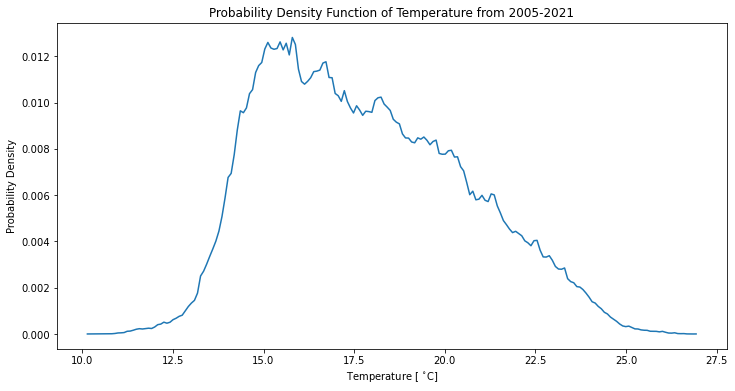

In [57]:
# part c: empirical probability density function

[num_bin,bin_edges] = np.histogram(SP.temp[~np.isnan(SP.temp)],bins=200)

mid_bins = (bin_edges[1:]+bin_edges[0:-1])/2

fig,ax = plt.subplots(1,1,figsize=(12,6))
plt.plot(mid_bins,num_bin/sum(num_bin))
ax.set_title('Probability Density Function of Temperature from 2005-2021')
ax.set_xlabel(r'Temperature [ $^{\circ} $C]'); ax.set_ylabel('Probability Density')
plt.show()

### The PDF of the 2005-2021 data looks more like a Gaussian distribution than the 2021 dataset, but it looks like there is some skew to the data - where the higher temperatures fall off more slowly versus the colder temperatures fall off more steeply.